In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.optimizers import Adam
from pandas import concat
from pandas import read_csv
from helper import series_to_supervised, stage_series_to_supervised

In [41]:
# dataset = pd.read_csv('../data/zeda/Merged-update_flowpos_hourly.csv', index_col=0)
dataset = pd.read_csv('../../../data/zeda/Merged-update_hourly.csv', index_col=0)
dataset.fillna(0, inplace=True)
data = dataset
data

,WS_S1,WS_S4,FLOW_S25A,GATE_S25A,HWS_S25A,TWS_S25A,FLOW_S25B,GATE_S25B,GATE_S25B2,HWS_S25B,TWS_S25B,PUMP_S25B,FLOW_S26,GATE_S26_1,GATE_S26_2,HWS_S26,TWS_S26,PUMP_S26,MEAN_RAIN
Time,,,,,,,,,,,,,,,,,,,
1/1/10 00:00,0.33,0.34,0.0,0.0,2.17,0.49,0.0,0.0,0.0,2.84,0.58,0.0,0.00,0.0,0.00,2.78,0.505,0.0,0.0
1/1/10 01:00,-0.29,-0.28,0.0,0.0,2.17,0.02,0.0,0.0,0.0,2.84,-0.07,0.0,0.00,0.0,0.00,2.78,-0.110,0.0,0.0
1/1/10 02:00,-0.81,-0.73,0.0,0.0,2.17,-0.49,0.0,0.0,0.0,2.84,-0.62,0.0,0.00,0.0,0.00,2.79,-0.650,0.0,0.0
1/1/10 03:00,-0.98,-0.85,0.0,0.0,2.15,-0.75,0.0,0.0,0.0,2.83,-0.82,0.0,0.00,0.0,0.00,2.79,-0.850,0.0,0.0
1/1/10 04:00,-0.69,-0.49,0.0,0.0,2.13,-0.55,0.0,0.0,0.0,2.84,-0.53,0.0,0.00,0.0,0.00,2.79,-0.550,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/31/20 19:00,1.24,1.19,0.0,0.0,1.92,1.25,0.0,0.0,0.0,2.86,1.31,0.0,456.34,0.0,2.61,2.49,1.290,0.0,0.0
12/31/20 20:00,1.62,1.61,0.0,0.0,1.92,1.64,0.0,0.0,0.0,2.88,1.68,0.0,380.19,0.0,2.62,2.48,1.660,0.0,0.0
12/31/20 21:00,1.98,1.90,0.0,0.0,1.93,2.00,0.0,0.0,0.0,2.89,2.04,0.0,287.12,0.0,2.62,2.54,2.040,0.0,0.0


In [42]:
print(data.columns)

Index(['WS_S1', 'WS_S4', 'FLOW_S25A', 'GATE_S25A', 'HWS_S25A', 'TWS_S25A',
       'FLOW_S25B', 'GATE_S25B', 'GATE_S25B2', 'HWS_S25B', 'TWS_S25B',
       'PUMP_S25B', 'FLOW_S26', 'GATE_S26_1', 'GATE_S26_2', 'HWS_S26',
       'TWS_S26', 'PUMP_S26', 'MEAN_RAIN'],
      dtype='object')


In [43]:
# specify the number of lag hours
n_hours = 24*7
K = 24

In [44]:
# Pre-processing
# Stage --> 8 stages
stages = dataset[['WS_S1', 'TWS_S25A', 'TWS_S25B', 'TWS_S26']]
print("stages.shape:", stages.shape)


stages_supervised = series_to_supervised(stages, n_hours, K)
print("stages_supervised.shape:", stages_supervised.shape)

stages.shape: (96432, 4)
stages_supervised.shape: (96241, 768)


In [45]:
# stages_head = dataset[['HWS_S25A', 'HWS_S25B', 'HWS_S26']]
# print("stages_head.shape:", stages_head.shape)

# stages_head_supervised = series_to_supervised(stages_head, n_hours, K)
# print("stages_head_supervised.shape:", stages_head_supervised.shape)

#### Non-stage

In [46]:
# non_stages = data[['WS_S4', 'FLOW_S25A', 'GATE_S25A', 'FLOW_S25B', 'GATE_S25B', 'FLOW_S26', 'GATE_S26', 'PUMP_S26', 'PUMP_S25B', 'MEAN_RAIN']]
non_stages = data[['WS_S4', 'FLOW_S25A', 'FLOW_S25B', 'FLOW_S26', 'PUMP_S26', 'PUMP_S25B', 'MEAN_RAIN']]
print("non_stages.shape:", non_stages.shape)

non_stages_supervised = series_to_supervised(non_stages, n_hours-1, 1)
print("non_stages_supervised.shape:", non_stages_supervised.shape)

non_stages.shape: (96432, 7)
non_stages_supervised.shape: (96265, 1176)


In [47]:
non_stages_supervised_cut = non_stages_supervised.iloc[24:, :]
print("non_stages_supervised_cut.shape:", non_stages_supervised_cut.shape)

non_stages_supervised_cut.shape: (96241, 1176)


In [48]:
# non_stages_supervised_cut

### N_out, N_in, K

In [49]:
# specify the number of lag hours
# n_hours = 72, stages_head.shape[1] + 
n_features = stages.shape[1] + non_stages.shape[1]   # 1 rainfall + FGate_S25A + FGate_S25B + FGate_S26 + 8WS + PUMP_S26
# K = 12

In [50]:
n_features

11

### Concatenation

In [51]:
# stages_head_supervised.reset_index(drop=True, inplace=True)
non_stages_supervised_cut.reset_index(drop=True, inplace=True)
stages_supervised.reset_index(drop=True, inplace=True)

all_data = concat([
                   non_stages_supervised_cut.iloc[:, :],
#                    stages_head_supervised.iloc[:, :-3*K],
                   stages_supervised.iloc[:, :]],
                   axis=1)

In [52]:
# print("all_data", all_data)
print("all_data.shape:", all_data.shape)

all_data.shape: (96241, 1944)


### Train & Test set

In [53]:
all_data = all_data.values
n_train_hours = int(len(all_data)*0.8)
print("n_train_hours:", n_train_hours)


train = all_data[:n_train_hours, :]
test = all_data[n_train_hours:, :]

n_train_hours: 76992


### Normalization

In [54]:
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -stages.shape[1]*K:]
test_X, test_y = test[:, :n_obs], test[:, -stages.shape[1]*K:]
print("train_X.shape, train_y.shape, test_X.shape, test_y.shape", train_X.shape, train_y.shape, test_X.shape, test_y.shape)


# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
train_X = scaler.fit_transform(train_X)
train_y = scaler.fit_transform(train_y)
test_X = scaler.fit_transform(test_X)
test_y = scaler.fit_transform(test_y)

train_X.shape, train_y.shape, test_X.shape, test_y.shape (76992, 1848) (76992, 96) (19249, 1848) (19249, 96)


In [55]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print("train_X.shape, train_y.shape, test_X.shape, test_y.shape: \n", train_X.shape, train_y.shape, test_X.shape, test_y.shape)

train_X.shape, train_y.shape, test_X.shape, test_y.shape: 
 (76992, 168, 11) (76992, 96) (19249, 168, 11) (19249, 96)


### Model
- filters=64, kernel_size=12, activation='relu', Dense(32), epoch=2000 --> 0.0010
- filters=64, kernel_size=3, activation='relu', Dense(32), epoch=3000 --> 0.0008

In [56]:
# define model
model_conv_mlp_60 = keras.Sequential()
model_conv_mlp_60.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model_conv_mlp_60.add(layers.MaxPooling1D(pool_size=2))
model_conv_mlp_60.add(layers.Flatten())
# model_conv_mlp_60.add(layers.Dense(32, activation='relu'))
model_conv_mlp_60.add(layers.Dense(train_y.shape[1]))
model_conv_mlp_60.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 166, 64)           2176      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 83, 64)           0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5312)              0         
                                                                 
 dense_5 (Dense)             (None, 96)                510048    
                                                                 
Total params: 512,224
Trainable params: 512,224
Non-trainable params: 0
_________________________________________________________________


In [57]:
lr = 0.00001
EPOCHS = 2000
model_conv_mlp_60.compile(
              optimizer=Adam(learning_rate=lr, decay=lr/EPOCHS), 
#               optimizer='adam',
              loss='mse',
              metrics=['mae'])

history = model_conv_mlp_60.fit(train_X, train_y,
                    batch_size=512,
                    epochs=EPOCHS,
                    validation_data=(test_X, test_y),
                    verbose=2,
                    shuffle=False)

plt.rcParams["figure.figsize"] = (8, 6)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(fontsize=14)
plt.title("Training loss vs Testing loss", fontsize=18)
# plt.savefig('graph/rnn_loss.png', dpi=300)
plt.show()

Epoch 1/2000
151/151 - 4s - loss: 0.0723 - mae: 0.2162 - val_loss: 0.0448 - val_mae: 0.1697 - 4s/epoch - 28ms/step
Epoch 2/2000
151/151 - 3s - loss: 0.0186 - mae: 0.1105 - val_loss: 0.0264 - val_mae: 0.1322 - 3s/epoch - 18ms/step
Epoch 3/2000
151/151 - 3s - loss: 0.0129 - mae: 0.0915 - val_loss: 0.0199 - val_mae: 0.1139 - 3s/epoch - 18ms/step
Epoch 4/2000
151/151 - 3s - loss: 0.0095 - mae: 0.0772 - val_loss: 0.0151 - val_mae: 0.0984 - 3s/epoch - 18ms/step
Epoch 5/2000
151/151 - 3s - loss: 0.0071 - mae: 0.0658 - val_loss: 0.0120 - val_mae: 0.0868 - 3s/epoch - 18ms/step
Epoch 6/2000
151/151 - 3s - loss: 0.0056 - mae: 0.0581 - val_loss: 0.0101 - val_mae: 0.0794 - 3s/epoch - 18ms/step
Epoch 7/2000
151/151 - 3s - loss: 0.0048 - mae: 0.0536 - val_loss: 0.0091 - val_mae: 0.0752 - 3s/epoch - 18ms/step
Epoch 8/2000
151/151 - 3s - loss: 0.0044 - mae: 0.0512 - val_loss: 0.0086 - val_mae: 0.0727 - 3s/epoch - 18ms/step
Epoch 9/2000
151/151 - 3s - loss: 0.0042 - mae: 0.0497 - val_loss: 0.0082 - val_

Epoch 72/2000
151/151 - 3s - loss: 0.0011 - mae: 0.0247 - val_loss: 0.0026 - val_mae: 0.0398 - 3s/epoch - 18ms/step
Epoch 73/2000
151/151 - 3s - loss: 0.0011 - mae: 0.0246 - val_loss: 0.0026 - val_mae: 0.0397 - 3s/epoch - 18ms/step
Epoch 74/2000
151/151 - 3s - loss: 0.0011 - mae: 0.0244 - val_loss: 0.0026 - val_mae: 0.0395 - 3s/epoch - 19ms/step
Epoch 75/2000
151/151 - 3s - loss: 0.0011 - mae: 0.0243 - val_loss: 0.0026 - val_mae: 0.0393 - 3s/epoch - 19ms/step
Epoch 76/2000
151/151 - 3s - loss: 0.0011 - mae: 0.0242 - val_loss: 0.0025 - val_mae: 0.0392 - 3s/epoch - 19ms/step
Epoch 77/2000
151/151 - 3s - loss: 0.0011 - mae: 0.0241 - val_loss: 0.0025 - val_mae: 0.0390 - 3s/epoch - 19ms/step
Epoch 78/2000
151/151 - 3s - loss: 0.0011 - mae: 0.0239 - val_loss: 0.0025 - val_mae: 0.0389 - 3s/epoch - 19ms/step
Epoch 79/2000
151/151 - 3s - loss: 0.0010 - mae: 0.0238 - val_loss: 0.0025 - val_mae: 0.0387 - 3s/epoch - 19ms/step
Epoch 80/2000
151/151 - 3s - loss: 0.0010 - mae: 0.0237 - val_loss: 0.00

Epoch 141/2000
151/151 - 3s - loss: 6.8444e-04 - mae: 0.0189 - val_loss: 0.0017 - val_mae: 0.0326 - 3s/epoch - 18ms/step
Epoch 142/2000
151/151 - 3s - loss: 6.8101e-04 - mae: 0.0189 - val_loss: 0.0017 - val_mae: 0.0326 - 3s/epoch - 17ms/step
Epoch 143/2000
151/151 - 3s - loss: 6.7761e-04 - mae: 0.0188 - val_loss: 0.0017 - val_mae: 0.0325 - 3s/epoch - 18ms/step
Epoch 144/2000
151/151 - 3s - loss: 6.7426e-04 - mae: 0.0188 - val_loss: 0.0017 - val_mae: 0.0325 - 3s/epoch - 18ms/step
Epoch 145/2000
151/151 - 3s - loss: 6.7095e-04 - mae: 0.0187 - val_loss: 0.0017 - val_mae: 0.0324 - 3s/epoch - 18ms/step
Epoch 146/2000
151/151 - 3s - loss: 6.6769e-04 - mae: 0.0187 - val_loss: 0.0017 - val_mae: 0.0323 - 3s/epoch - 18ms/step
Epoch 147/2000
151/151 - 3s - loss: 6.6446e-04 - mae: 0.0186 - val_loss: 0.0017 - val_mae: 0.0323 - 3s/epoch - 18ms/step
Epoch 148/2000
151/151 - 3s - loss: 6.6127e-04 - mae: 0.0186 - val_loss: 0.0017 - val_mae: 0.0322 - 3s/epoch - 17ms/step
Epoch 149/2000
151/151 - 3s - lo

Epoch 242/2000
151/151 - 3s - loss: 4.7425e-04 - mae: 0.0155 - val_loss: 0.0013 - val_mae: 0.0281 - 3s/epoch - 18ms/step
Epoch 243/2000
151/151 - 3s - loss: 4.7300e-04 - mae: 0.0155 - val_loss: 0.0013 - val_mae: 0.0280 - 3s/epoch - 18ms/step
Epoch 244/2000
151/151 - 3s - loss: 4.7175e-04 - mae: 0.0155 - val_loss: 0.0013 - val_mae: 0.0280 - 3s/epoch - 19ms/step
Epoch 245/2000
151/151 - 3s - loss: 4.7051e-04 - mae: 0.0154 - val_loss: 0.0013 - val_mae: 0.0280 - 3s/epoch - 19ms/step
Epoch 246/2000
151/151 - 3s - loss: 4.6928e-04 - mae: 0.0154 - val_loss: 0.0013 - val_mae: 0.0279 - 3s/epoch - 19ms/step
Epoch 247/2000
151/151 - 3s - loss: 4.6806e-04 - mae: 0.0154 - val_loss: 0.0013 - val_mae: 0.0279 - 3s/epoch - 19ms/step
Epoch 248/2000
151/151 - 3s - loss: 4.6685e-04 - mae: 0.0154 - val_loss: 0.0013 - val_mae: 0.0279 - 3s/epoch - 19ms/step
Epoch 249/2000
151/151 - 3s - loss: 4.6565e-04 - mae: 0.0153 - val_loss: 0.0013 - val_mae: 0.0278 - 3s/epoch - 19ms/step
Epoch 250/2000
151/151 - 3s - lo

Epoch 310/2000
151/151 - 3s - loss: 4.0577e-04 - mae: 0.0142 - val_loss: 0.0011 - val_mae: 0.0262 - 3s/epoch - 19ms/step
Epoch 311/2000
151/151 - 3s - loss: 4.0497e-04 - mae: 0.0142 - val_loss: 0.0011 - val_mae: 0.0262 - 3s/epoch - 19ms/step
Epoch 312/2000
151/151 - 3s - loss: 4.0417e-04 - mae: 0.0142 - val_loss: 0.0011 - val_mae: 0.0261 - 3s/epoch - 18ms/step
Epoch 313/2000
151/151 - 3s - loss: 4.0337e-04 - mae: 0.0142 - val_loss: 0.0011 - val_mae: 0.0261 - 3s/epoch - 18ms/step
Epoch 314/2000
151/151 - 3s - loss: 4.0258e-04 - mae: 0.0142 - val_loss: 0.0011 - val_mae: 0.0261 - 3s/epoch - 18ms/step
Epoch 315/2000
151/151 - 3s - loss: 4.0179e-04 - mae: 0.0142 - val_loss: 0.0011 - val_mae: 0.0261 - 3s/epoch - 19ms/step
Epoch 316/2000
151/151 - 3s - loss: 4.0100e-04 - mae: 0.0141 - val_loss: 0.0011 - val_mae: 0.0261 - 3s/epoch - 18ms/step
Epoch 317/2000
151/151 - 3s - loss: 4.0022e-04 - mae: 0.0141 - val_loss: 0.0011 - val_mae: 0.0260 - 3s/epoch - 19ms/step
Epoch 318/2000
151/151 - 3s - lo

Epoch 378/2000
151/151 - 3s - loss: 3.5946e-04 - mae: 0.0133 - val_loss: 0.0010 - val_mae: 0.0248 - 3s/epoch - 18ms/step
Epoch 379/2000
151/151 - 3s - loss: 3.5889e-04 - mae: 0.0133 - val_loss: 0.0010 - val_mae: 0.0248 - 3s/epoch - 19ms/step
Epoch 380/2000
151/151 - 3s - loss: 3.5831e-04 - mae: 0.0133 - val_loss: 0.0010 - val_mae: 0.0248 - 3s/epoch - 19ms/step
Epoch 381/2000
151/151 - 3s - loss: 3.5774e-04 - mae: 0.0133 - val_loss: 0.0010 - val_mae: 0.0248 - 3s/epoch - 19ms/step
Epoch 382/2000
151/151 - 3s - loss: 3.5717e-04 - mae: 0.0133 - val_loss: 0.0010 - val_mae: 0.0248 - 3s/epoch - 19ms/step
Epoch 383/2000
151/151 - 3s - loss: 3.5661e-04 - mae: 0.0132 - val_loss: 0.0010 - val_mae: 0.0248 - 3s/epoch - 18ms/step
Epoch 384/2000
151/151 - 3s - loss: 3.5604e-04 - mae: 0.0132 - val_loss: 0.0010 - val_mae: 0.0247 - 3s/epoch - 19ms/step
Epoch 385/2000
151/151 - 3s - loss: 3.5548e-04 - mae: 0.0132 - val_loss: 0.0010 - val_mae: 0.0247 - 3s/epoch - 19ms/step
Epoch 386/2000
151/151 - 3s - lo

Epoch 444/2000
151/151 - 3s - loss: 3.2581e-04 - mae: 0.0126 - val_loss: 9.3973e-04 - val_mae: 0.0240 - 3s/epoch - 18ms/step
Epoch 445/2000
151/151 - 3s - loss: 3.2535e-04 - mae: 0.0126 - val_loss: 9.3805e-04 - val_mae: 0.0240 - 3s/epoch - 19ms/step
Epoch 446/2000
151/151 - 3s - loss: 3.2493e-04 - mae: 0.0126 - val_loss: 9.3828e-04 - val_mae: 0.0240 - 3s/epoch - 19ms/step
Epoch 447/2000
151/151 - 3s - loss: 3.2446e-04 - mae: 0.0126 - val_loss: 9.3642e-04 - val_mae: 0.0240 - 3s/epoch - 19ms/step
Epoch 448/2000
151/151 - 3s - loss: 3.2405e-04 - mae: 0.0126 - val_loss: 9.3683e-04 - val_mae: 0.0240 - 3s/epoch - 19ms/step
Epoch 449/2000
151/151 - 3s - loss: 3.2358e-04 - mae: 0.0125 - val_loss: 9.3483e-04 - val_mae: 0.0239 - 3s/epoch - 19ms/step
Epoch 450/2000
151/151 - 3s - loss: 3.2318e-04 - mae: 0.0125 - val_loss: 9.3525e-04 - val_mae: 0.0239 - 3s/epoch - 19ms/step
Epoch 451/2000
151/151 - 3s - loss: 3.2270e-04 - mae: 0.0125 - val_loss: 9.3326e-04 - val_mae: 0.0239 - 3s/epoch - 19ms/step


Epoch 510/2000
151/151 - 3s - loss: 2.9957e-04 - mae: 0.0120 - val_loss: 9.0062e-04 - val_mae: 0.0236 - 3s/epoch - 19ms/step
Epoch 511/2000
151/151 - 3s - loss: 2.9913e-04 - mae: 0.0120 - val_loss: 8.9061e-04 - val_mae: 0.0234 - 3s/epoch - 19ms/step
Epoch 512/2000
151/151 - 3s - loss: 2.9886e-04 - mae: 0.0120 - val_loss: 8.9958e-04 - val_mae: 0.0235 - 3s/epoch - 18ms/step
Epoch 513/2000
151/151 - 3s - loss: 2.9842e-04 - mae: 0.0120 - val_loss: 8.8936e-04 - val_mae: 0.0234 - 3s/epoch - 18ms/step
Epoch 514/2000
151/151 - 3s - loss: 2.9816e-04 - mae: 0.0120 - val_loss: 8.9870e-04 - val_mae: 0.0235 - 3s/epoch - 18ms/step
Epoch 515/2000
151/151 - 3s - loss: 2.9772e-04 - mae: 0.0120 - val_loss: 8.8804e-04 - val_mae: 0.0234 - 3s/epoch - 19ms/step
Epoch 516/2000
151/151 - 3s - loss: 2.9746e-04 - mae: 0.0120 - val_loss: 8.9798e-04 - val_mae: 0.0235 - 3s/epoch - 19ms/step
Epoch 517/2000
151/151 - 3s - loss: 2.9702e-04 - mae: 0.0119 - val_loss: 8.8664e-04 - val_mae: 0.0234 - 3s/epoch - 19ms/step


Epoch 576/2000
151/151 - 3s - loss: 2.7860e-04 - mae: 0.0115 - val_loss: 8.8264e-04 - val_mae: 0.0234 - 3s/epoch - 19ms/step
Epoch 577/2000
151/151 - 3s - loss: 2.7818e-04 - mae: 0.0115 - val_loss: 8.3880e-04 - val_mae: 0.0228 - 3s/epoch - 18ms/step
Epoch 578/2000
151/151 - 3s - loss: 2.7804e-04 - mae: 0.0115 - val_loss: 8.8210e-04 - val_mae: 0.0234 - 3s/epoch - 18ms/step
Epoch 579/2000
151/151 - 3s - loss: 2.7761e-04 - mae: 0.0115 - val_loss: 8.3764e-04 - val_mae: 0.0227 - 3s/epoch - 18ms/step
Epoch 580/2000
151/151 - 3s - loss: 2.7747e-04 - mae: 0.0115 - val_loss: 8.8159e-04 - val_mae: 0.0234 - 3s/epoch - 18ms/step
Epoch 581/2000
151/151 - 3s - loss: 2.7705e-04 - mae: 0.0115 - val_loss: 8.3649e-04 - val_mae: 0.0227 - 3s/epoch - 18ms/step
Epoch 582/2000
151/151 - 3s - loss: 2.7691e-04 - mae: 0.0115 - val_loss: 8.8103e-04 - val_mae: 0.0233 - 3s/epoch - 18ms/step
Epoch 583/2000
151/151 - 3s - loss: 2.7649e-04 - mae: 0.0115 - val_loss: 8.3527e-04 - val_mae: 0.0227 - 3s/epoch - 18ms/step


Epoch 642/2000
151/151 - 3s - loss: 2.6160e-04 - mae: 0.0111 - val_loss: 8.6544e-04 - val_mae: 0.0232 - 3s/epoch - 18ms/step
Epoch 643/2000
151/151 - 3s - loss: 2.6127e-04 - mae: 0.0111 - val_loss: 8.0172e-04 - val_mae: 0.0223 - 3s/epoch - 19ms/step
Epoch 644/2000
151/151 - 3s - loss: 2.6113e-04 - mae: 0.0111 - val_loss: 8.6500e-04 - val_mae: 0.0232 - 3s/epoch - 19ms/step
Epoch 645/2000
151/151 - 3s - loss: 2.6081e-04 - mae: 0.0111 - val_loss: 8.0072e-04 - val_mae: 0.0223 - 3s/epoch - 19ms/step
Epoch 646/2000
151/151 - 3s - loss: 2.6067e-04 - mae: 0.0111 - val_loss: 8.6454e-04 - val_mae: 0.0232 - 3s/epoch - 18ms/step
Epoch 647/2000
151/151 - 3s - loss: 2.6035e-04 - mae: 0.0111 - val_loss: 7.9972e-04 - val_mae: 0.0223 - 3s/epoch - 18ms/step
Epoch 648/2000
151/151 - 3s - loss: 2.6021e-04 - mae: 0.0111 - val_loss: 8.6411e-04 - val_mae: 0.0232 - 3s/epoch - 19ms/step
Epoch 649/2000
151/151 - 3s - loss: 2.5990e-04 - mae: 0.0111 - val_loss: 7.9876e-04 - val_mae: 0.0223 - 3s/epoch - 18ms/step


Epoch 708/2000
151/151 - 3s - loss: 2.4767e-04 - mae: 0.0108 - val_loss: 8.5162e-04 - val_mae: 0.0230 - 3s/epoch - 18ms/step
Epoch 709/2000
151/151 - 3s - loss: 2.4753e-04 - mae: 0.0108 - val_loss: 7.7212e-04 - val_mae: 0.0219 - 3s/epoch - 19ms/step
Epoch 710/2000
151/151 - 3s - loss: 2.4729e-04 - mae: 0.0107 - val_loss: 8.5125e-04 - val_mae: 0.0230 - 3s/epoch - 19ms/step
Epoch 711/2000
151/151 - 3s - loss: 2.4715e-04 - mae: 0.0107 - val_loss: 7.7137e-04 - val_mae: 0.0219 - 3s/epoch - 19ms/step
Epoch 712/2000
151/151 - 3s - loss: 2.4691e-04 - mae: 0.0107 - val_loss: 8.5094e-04 - val_mae: 0.0230 - 3s/epoch - 19ms/step
Epoch 713/2000
151/151 - 3s - loss: 2.4678e-04 - mae: 0.0107 - val_loss: 7.7061e-04 - val_mae: 0.0219 - 3s/epoch - 19ms/step
Epoch 714/2000
151/151 - 3s - loss: 2.4654e-04 - mae: 0.0107 - val_loss: 8.5062e-04 - val_mae: 0.0230 - 3s/epoch - 19ms/step
Epoch 715/2000
151/151 - 3s - loss: 2.4641e-04 - mae: 0.0107 - val_loss: 7.6985e-04 - val_mae: 0.0219 - 3s/epoch - 18ms/step


Epoch 774/2000
151/151 - 3s - loss: 2.3625e-04 - mae: 0.0105 - val_loss: 8.4112e-04 - val_mae: 0.0228 - 3s/epoch - 17ms/step
Epoch 775/2000
151/151 - 3s - loss: 2.3635e-04 - mae: 0.0105 - val_loss: 7.4875e-04 - val_mae: 0.0216 - 3s/epoch - 18ms/step
Epoch 776/2000
151/151 - 3s - loss: 2.3594e-04 - mae: 0.0105 - val_loss: 8.4083e-04 - val_mae: 0.0228 - 3s/epoch - 19ms/step
Epoch 777/2000
151/151 - 3s - loss: 2.3604e-04 - mae: 0.0105 - val_loss: 7.4813e-04 - val_mae: 0.0216 - 3s/epoch - 19ms/step
Epoch 778/2000
151/151 - 3s - loss: 2.3563e-04 - mae: 0.0104 - val_loss: 8.4057e-04 - val_mae: 0.0228 - 3s/epoch - 19ms/step
Epoch 779/2000
151/151 - 3s - loss: 2.3574e-04 - mae: 0.0105 - val_loss: 7.4750e-04 - val_mae: 0.0216 - 3s/epoch - 19ms/step
Epoch 780/2000
151/151 - 3s - loss: 2.3532e-04 - mae: 0.0104 - val_loss: 8.4032e-04 - val_mae: 0.0228 - 3s/epoch - 18ms/step
Epoch 781/2000
151/151 - 3s - loss: 2.3544e-04 - mae: 0.0105 - val_loss: 7.4687e-04 - val_mae: 0.0216 - 3s/epoch - 19ms/step


Epoch 840/2000
151/151 - 3s - loss: 2.2676e-04 - mae: 0.0102 - val_loss: 8.3339e-04 - val_mae: 0.0227 - 3s/epoch - 18ms/step
Epoch 841/2000
151/151 - 3s - loss: 2.2714e-04 - mae: 0.0102 - val_loss: 7.3048e-04 - val_mae: 0.0214 - 3s/epoch - 18ms/step
Epoch 842/2000
151/151 - 3s - loss: 2.2650e-04 - mae: 0.0102 - val_loss: 8.3316e-04 - val_mae: 0.0227 - 3s/epoch - 18ms/step
Epoch 843/2000
151/151 - 3s - loss: 2.2688e-04 - mae: 0.0102 - val_loss: 7.2998e-04 - val_mae: 0.0214 - 3s/epoch - 18ms/step
Epoch 844/2000
151/151 - 3s - loss: 2.2624e-04 - mae: 0.0102 - val_loss: 8.3295e-04 - val_mae: 0.0227 - 3s/epoch - 19ms/step
Epoch 845/2000
151/151 - 3s - loss: 2.2663e-04 - mae: 0.0102 - val_loss: 7.2951e-04 - val_mae: 0.0214 - 3s/epoch - 17ms/step
Epoch 846/2000
151/151 - 3s - loss: 2.2598e-04 - mae: 0.0102 - val_loss: 8.3270e-04 - val_mae: 0.0227 - 3s/epoch - 18ms/step
Epoch 847/2000
151/151 - 3s - loss: 2.2638e-04 - mae: 0.0102 - val_loss: 7.2903e-04 - val_mae: 0.0214 - 3s/epoch - 18ms/step


Epoch 906/2000
151/151 - 3s - loss: 2.1878e-04 - mae: 0.0100 - val_loss: 8.2721e-04 - val_mae: 0.0226 - 3s/epoch - 19ms/step
Epoch 907/2000
151/151 - 3s - loss: 2.1943e-04 - mae: 0.0100 - val_loss: 7.1657e-04 - val_mae: 0.0212 - 3s/epoch - 19ms/step
Epoch 908/2000
151/151 - 3s - loss: 2.1856e-04 - mae: 0.0100 - val_loss: 8.2706e-04 - val_mae: 0.0226 - 3s/epoch - 18ms/step
Epoch 909/2000
151/151 - 3s - loss: 2.1921e-04 - mae: 0.0100 - val_loss: 7.1619e-04 - val_mae: 0.0212 - 3s/epoch - 19ms/step
Epoch 910/2000
151/151 - 3s - loss: 2.1834e-04 - mae: 0.0100 - val_loss: 8.2688e-04 - val_mae: 0.0226 - 3s/epoch - 19ms/step
Epoch 911/2000
151/151 - 3s - loss: 2.1900e-04 - mae: 0.0100 - val_loss: 7.1583e-04 - val_mae: 0.0212 - 3s/epoch - 18ms/step
Epoch 912/2000
151/151 - 3s - loss: 2.1812e-04 - mae: 0.0100 - val_loss: 8.2672e-04 - val_mae: 0.0226 - 3s/epoch - 19ms/step
Epoch 913/2000
151/151 - 3s - loss: 2.1879e-04 - mae: 0.0100 - val_loss: 7.1548e-04 - val_mae: 0.0212 - 3s/epoch - 19ms/step


Epoch 972/2000
151/151 - 3s - loss: 2.1198e-04 - mae: 0.0098 - val_loss: 8.2260e-04 - val_mae: 0.0225 - 3s/epoch - 18ms/step
Epoch 973/2000
151/151 - 3s - loss: 2.1285e-04 - mae: 0.0099 - val_loss: 7.0647e-04 - val_mae: 0.0211 - 3s/epoch - 19ms/step
Epoch 974/2000
151/151 - 3s - loss: 2.1179e-04 - mae: 0.0098 - val_loss: 8.2249e-04 - val_mae: 0.0225 - 3s/epoch - 18ms/step
Epoch 975/2000
151/151 - 3s - loss: 2.1267e-04 - mae: 0.0098 - val_loss: 7.0616e-04 - val_mae: 0.0211 - 3s/epoch - 18ms/step
Epoch 976/2000
151/151 - 3s - loss: 2.1160e-04 - mae: 0.0098 - val_loss: 8.2230e-04 - val_mae: 0.0225 - 3s/epoch - 18ms/step
Epoch 977/2000
151/151 - 3s - loss: 2.1249e-04 - mae: 0.0098 - val_loss: 7.0591e-04 - val_mae: 0.0211 - 3s/epoch - 18ms/step
Epoch 978/2000
151/151 - 3s - loss: 2.1141e-04 - mae: 0.0098 - val_loss: 8.2213e-04 - val_mae: 0.0225 - 3s/epoch - 18ms/step
Epoch 979/2000
151/151 - 3s - loss: 2.1230e-04 - mae: 0.0098 - val_loss: 7.0559e-04 - val_mae: 0.0211 - 3s/epoch - 18ms/step


Epoch 1038/2000
151/151 - 3s - loss: 2.0612e-04 - mae: 0.0097 - val_loss: 8.1902e-04 - val_mae: 0.0224 - 3s/epoch - 19ms/step
Epoch 1039/2000
151/151 - 3s - loss: 2.0717e-04 - mae: 0.0097 - val_loss: 6.9883e-04 - val_mae: 0.0210 - 3s/epoch - 19ms/step
Epoch 1040/2000
151/151 - 3s - loss: 2.0595e-04 - mae: 0.0096 - val_loss: 8.1896e-04 - val_mae: 0.0224 - 3s/epoch - 19ms/step
Epoch 1041/2000
151/151 - 3s - loss: 2.0701e-04 - mae: 0.0097 - val_loss: 6.9866e-04 - val_mae: 0.0210 - 3s/epoch - 19ms/step
Epoch 1042/2000
151/151 - 3s - loss: 2.0579e-04 - mae: 0.0096 - val_loss: 8.1889e-04 - val_mae: 0.0224 - 3s/epoch - 18ms/step
Epoch 1043/2000
151/151 - 3s - loss: 2.0685e-04 - mae: 0.0097 - val_loss: 6.9847e-04 - val_mae: 0.0210 - 3s/epoch - 18ms/step
Epoch 1044/2000
151/151 - 3s - loss: 2.0563e-04 - mae: 0.0096 - val_loss: 8.1884e-04 - val_mae: 0.0224 - 3s/epoch - 19ms/step
Epoch 1045/2000
151/151 - 3s - loss: 2.0669e-04 - mae: 0.0097 - val_loss: 6.9829e-04 - val_mae: 0.0210 - 3s/epoch - 18

151/151 - 3s - loss: 2.0233e-04 - mae: 0.0096 - val_loss: 6.9412e-04 - val_mae: 0.0210 - 3s/epoch - 18ms/step
Epoch 1104/2000
151/151 - 3s - loss: 2.0098e-04 - mae: 0.0095 - val_loss: 8.1708e-04 - val_mae: 0.0224 - 3s/epoch - 17ms/step
Epoch 1105/2000
151/151 - 3s - loss: 2.0219e-04 - mae: 0.0096 - val_loss: 6.9397e-04 - val_mae: 0.0210 - 3s/epoch - 19ms/step
Epoch 1106/2000
151/151 - 3s - loss: 2.0084e-04 - mae: 0.0095 - val_loss: 8.1703e-04 - val_mae: 0.0224 - 3s/epoch - 18ms/step
Epoch 1107/2000
151/151 - 3s - loss: 2.0205e-04 - mae: 0.0096 - val_loss: 6.9383e-04 - val_mae: 0.0210 - 3s/epoch - 18ms/step
Epoch 1108/2000
151/151 - 3s - loss: 2.0069e-04 - mae: 0.0095 - val_loss: 8.1699e-04 - val_mae: 0.0224 - 3s/epoch - 17ms/step
Epoch 1109/2000
151/151 - 3s - loss: 2.0191e-04 - mae: 0.0095 - val_loss: 6.9372e-04 - val_mae: 0.0210 - 3s/epoch - 18ms/step
Epoch 1110/2000
151/151 - 3s - loss: 2.0055e-04 - mae: 0.0095 - val_loss: 8.1688e-04 - val_mae: 0.0224 - 3s/epoch - 18ms/step
Epoch 11

Epoch 1169/2000
151/151 - 3s - loss: 1.9789e-04 - mae: 0.0094 - val_loss: 6.9080e-04 - val_mae: 0.0210 - 3s/epoch - 18ms/step
Epoch 1170/2000
151/151 - 3s - loss: 1.9644e-04 - mae: 0.0094 - val_loss: 8.1519e-04 - val_mae: 0.0223 - 3s/epoch - 18ms/step
Epoch 1171/2000
151/151 - 3s - loss: 1.9776e-04 - mae: 0.0094 - val_loss: 6.9071e-04 - val_mae: 0.0210 - 3s/epoch - 18ms/step
Epoch 1172/2000
151/151 - 3s - loss: 1.9631e-04 - mae: 0.0094 - val_loss: 8.1518e-04 - val_mae: 0.0223 - 3s/epoch - 18ms/step
Epoch 1173/2000
151/151 - 3s - loss: 1.9764e-04 - mae: 0.0094 - val_loss: 6.9062e-04 - val_mae: 0.0210 - 3s/epoch - 18ms/step
Epoch 1174/2000
151/151 - 3s - loss: 1.9618e-04 - mae: 0.0094 - val_loss: 8.1517e-04 - val_mae: 0.0223 - 3s/epoch - 18ms/step
Epoch 1175/2000
151/151 - 3s - loss: 1.9751e-04 - mae: 0.0094 - val_loss: 6.9052e-04 - val_mae: 0.0210 - 3s/epoch - 18ms/step
Epoch 1176/2000
151/151 - 3s - loss: 1.9605e-04 - mae: 0.0094 - val_loss: 8.1511e-04 - val_mae: 0.0223 - 3s/epoch - 18

151/151 - 3s - loss: 1.9252e-04 - mae: 0.0093 - val_loss: 8.1440e-04 - val_mae: 0.0223 - 3s/epoch - 18ms/step
Epoch 1235/2000
151/151 - 3s - loss: 1.9393e-04 - mae: 0.0093 - val_loss: 6.8841e-04 - val_mae: 0.0210 - 3s/epoch - 18ms/step
Epoch 1236/2000
151/151 - 3s - loss: 1.9240e-04 - mae: 0.0093 - val_loss: 8.1434e-04 - val_mae: 0.0223 - 3s/epoch - 18ms/step
Epoch 1237/2000
151/151 - 3s - loss: 1.9381e-04 - mae: 0.0093 - val_loss: 6.8832e-04 - val_mae: 0.0210 - 3s/epoch - 18ms/step
Epoch 1238/2000
151/151 - 3s - loss: 1.9229e-04 - mae: 0.0093 - val_loss: 8.1427e-04 - val_mae: 0.0223 - 3s/epoch - 17ms/step
Epoch 1239/2000
151/151 - 3s - loss: 1.9370e-04 - mae: 0.0093 - val_loss: 6.8825e-04 - val_mae: 0.0210 - 3s/epoch - 18ms/step
Epoch 1240/2000
151/151 - 3s - loss: 1.9217e-04 - mae: 0.0093 - val_loss: 8.1421e-04 - val_mae: 0.0223 - 3s/epoch - 18ms/step
Epoch 1241/2000
151/151 - 3s - loss: 1.9358e-04 - mae: 0.0093 - val_loss: 6.8819e-04 - val_mae: 0.0210 - 3s/epoch - 18ms/step
Epoch 12

Epoch 1300/2000
151/151 - 3s - loss: 1.8889e-04 - mae: 0.0092 - val_loss: 8.1342e-04 - val_mae: 0.0223 - 3s/epoch - 18ms/step
Epoch 1301/2000
151/151 - 3s - loss: 1.9034e-04 - mae: 0.0092 - val_loss: 6.8657e-04 - val_mae: 0.0210 - 3s/epoch - 18ms/step
Epoch 1302/2000
151/151 - 3s - loss: 1.8879e-04 - mae: 0.0092 - val_loss: 8.1341e-04 - val_mae: 0.0223 - 3s/epoch - 18ms/step
Epoch 1303/2000
151/151 - 3s - loss: 1.9024e-04 - mae: 0.0092 - val_loss: 6.8654e-04 - val_mae: 0.0210 - 3s/epoch - 18ms/step
Epoch 1304/2000
151/151 - 3s - loss: 1.8869e-04 - mae: 0.0092 - val_loss: 8.1339e-04 - val_mae: 0.0223 - 3s/epoch - 18ms/step
Epoch 1305/2000
151/151 - 3s - loss: 1.9014e-04 - mae: 0.0092 - val_loss: 6.8657e-04 - val_mae: 0.0210 - 3s/epoch - 19ms/step
Epoch 1306/2000
151/151 - 3s - loss: 1.8858e-04 - mae: 0.0091 - val_loss: 8.1333e-04 - val_mae: 0.0223 - 3s/epoch - 19ms/step
Epoch 1307/2000
151/151 - 3s - loss: 1.9004e-04 - mae: 0.0092 - val_loss: 6.8652e-04 - val_mae: 0.0210 - 3s/epoch - 18

151/151 - 3s - loss: 1.8719e-04 - mae: 0.0091 - val_loss: 6.8585e-04 - val_mae: 0.0210 - 3s/epoch - 18ms/step
Epoch 1366/2000
151/151 - 3s - loss: 1.8562e-04 - mae: 0.0091 - val_loss: 8.1290e-04 - val_mae: 0.0223 - 3s/epoch - 19ms/step
Epoch 1367/2000
151/151 - 3s - loss: 1.8710e-04 - mae: 0.0091 - val_loss: 6.8581e-04 - val_mae: 0.0210 - 3s/epoch - 18ms/step
Epoch 1368/2000
151/151 - 3s - loss: 1.8552e-04 - mae: 0.0091 - val_loss: 8.1280e-04 - val_mae: 0.0223 - 3s/epoch - 18ms/step
Epoch 1369/2000
151/151 - 3s - loss: 1.8700e-04 - mae: 0.0091 - val_loss: 6.8581e-04 - val_mae: 0.0210 - 3s/epoch - 18ms/step
Epoch 1370/2000
151/151 - 3s - loss: 1.8543e-04 - mae: 0.0091 - val_loss: 8.1277e-04 - val_mae: 0.0223 - 3s/epoch - 19ms/step
Epoch 1371/2000
151/151 - 3s - loss: 1.8690e-04 - mae: 0.0091 - val_loss: 6.8579e-04 - val_mae: 0.0210 - 3s/epoch - 19ms/step
Epoch 1372/2000
151/151 - 3s - loss: 1.8533e-04 - mae: 0.0091 - val_loss: 8.1279e-04 - val_mae: 0.0223 - 3s/epoch - 18ms/step
Epoch 13

Epoch 1431/2000
151/151 - 3s - loss: 1.8420e-04 - mae: 0.0090 - val_loss: 6.8561e-04 - val_mae: 0.0210 - 3s/epoch - 19ms/step
Epoch 1432/2000
151/151 - 3s - loss: 1.8264e-04 - mae: 0.0090 - val_loss: 8.1216e-04 - val_mae: 0.0223 - 3s/epoch - 19ms/step
Epoch 1433/2000
151/151 - 3s - loss: 1.8412e-04 - mae: 0.0090 - val_loss: 6.8560e-04 - val_mae: 0.0210 - 3s/epoch - 19ms/step
Epoch 1434/2000
151/151 - 3s - loss: 1.8256e-04 - mae: 0.0090 - val_loss: 8.1209e-04 - val_mae: 0.0223 - 3s/epoch - 19ms/step
Epoch 1435/2000
151/151 - 3s - loss: 1.8403e-04 - mae: 0.0090 - val_loss: 6.8565e-04 - val_mae: 0.0210 - 3s/epoch - 19ms/step
Epoch 1436/2000
151/151 - 3s - loss: 1.8247e-04 - mae: 0.0090 - val_loss: 8.1204e-04 - val_mae: 0.0223 - 3s/epoch - 18ms/step
Epoch 1437/2000
151/151 - 3s - loss: 1.8395e-04 - mae: 0.0090 - val_loss: 6.8560e-04 - val_mae: 0.0210 - 3s/epoch - 18ms/step
Epoch 1438/2000
151/151 - 3s - loss: 1.8239e-04 - mae: 0.0090 - val_loss: 8.1198e-04 - val_mae: 0.0223 - 3s/epoch - 18

151/151 - 3s - loss: 1.8001e-04 - mae: 0.0089 - val_loss: 8.1085e-04 - val_mae: 0.0223 - 3s/epoch - 19ms/step
Epoch 1497/2000
151/151 - 3s - loss: 1.8146e-04 - mae: 0.0090 - val_loss: 6.8553e-04 - val_mae: 0.0210 - 3s/epoch - 18ms/step
Epoch 1498/2000
151/151 - 3s - loss: 1.7994e-04 - mae: 0.0089 - val_loss: 8.1085e-04 - val_mae: 0.0223 - 3s/epoch - 18ms/step
Epoch 1499/2000
151/151 - 3s - loss: 1.8138e-04 - mae: 0.0090 - val_loss: 6.8553e-04 - val_mae: 0.0210 - 3s/epoch - 18ms/step
Epoch 1500/2000
151/151 - 3s - loss: 1.7986e-04 - mae: 0.0089 - val_loss: 8.1082e-04 - val_mae: 0.0223 - 3s/epoch - 18ms/step
Epoch 1501/2000
151/151 - 3s - loss: 1.8130e-04 - mae: 0.0090 - val_loss: 6.8550e-04 - val_mae: 0.0210 - 3s/epoch - 19ms/step
Epoch 1502/2000
151/151 - 3s - loss: 1.7978e-04 - mae: 0.0089 - val_loss: 8.1073e-04 - val_mae: 0.0223 - 3s/epoch - 19ms/step
Epoch 1503/2000
151/151 - 3s - loss: 1.8122e-04 - mae: 0.0090 - val_loss: 6.8548e-04 - val_mae: 0.0210 - 3s/epoch - 18ms/step
Epoch 15

Epoch 1562/2000
151/151 - 3s - loss: 1.7754e-04 - mae: 0.0088 - val_loss: 8.0904e-04 - val_mae: 0.0223 - 3s/epoch - 18ms/step
Epoch 1563/2000
151/151 - 3s - loss: 1.7893e-04 - mae: 0.0089 - val_loss: 6.8500e-04 - val_mae: 0.0211 - 3s/epoch - 18ms/step
Epoch 1564/2000
151/151 - 3s - loss: 1.7747e-04 - mae: 0.0088 - val_loss: 8.0895e-04 - val_mae: 0.0223 - 3s/epoch - 18ms/step
Epoch 1565/2000
151/151 - 3s - loss: 1.7886e-04 - mae: 0.0089 - val_loss: 6.8497e-04 - val_mae: 0.0211 - 3s/epoch - 19ms/step
Epoch 1566/2000
151/151 - 3s - loss: 1.7739e-04 - mae: 0.0088 - val_loss: 8.0882e-04 - val_mae: 0.0223 - 3s/epoch - 18ms/step
Epoch 1567/2000
151/151 - 3s - loss: 1.7878e-04 - mae: 0.0089 - val_loss: 6.8495e-04 - val_mae: 0.0211 - 3s/epoch - 19ms/step
Epoch 1568/2000
151/151 - 3s - loss: 1.7732e-04 - mae: 0.0088 - val_loss: 8.0875e-04 - val_mae: 0.0223 - 3s/epoch - 18ms/step
Epoch 1569/2000
151/151 - 3s - loss: 1.7871e-04 - mae: 0.0089 - val_loss: 6.8495e-04 - val_mae: 0.0211 - 3s/epoch - 18

151/151 - 3s - loss: 1.7667e-04 - mae: 0.0088 - val_loss: 6.8410e-04 - val_mae: 0.0211 - 3s/epoch - 19ms/step
Epoch 1628/2000
151/151 - 3s - loss: 1.7527e-04 - mae: 0.0088 - val_loss: 8.0644e-04 - val_mae: 0.0223 - 3s/epoch - 18ms/step
Epoch 1629/2000
151/151 - 3s - loss: 1.7661e-04 - mae: 0.0088 - val_loss: 6.8404e-04 - val_mae: 0.0211 - 3s/epoch - 18ms/step
Epoch 1630/2000
151/151 - 3s - loss: 1.7521e-04 - mae: 0.0088 - val_loss: 8.0634e-04 - val_mae: 0.0223 - 3s/epoch - 18ms/step
Epoch 1631/2000
151/151 - 3s - loss: 1.7654e-04 - mae: 0.0088 - val_loss: 6.8396e-04 - val_mae: 0.0211 - 3s/epoch - 18ms/step
Epoch 1632/2000
151/151 - 3s - loss: 1.7514e-04 - mae: 0.0087 - val_loss: 8.0625e-04 - val_mae: 0.0223 - 3s/epoch - 17ms/step
Epoch 1633/2000
151/151 - 3s - loss: 1.7647e-04 - mae: 0.0088 - val_loss: 6.8391e-04 - val_mae: 0.0211 - 3s/epoch - 18ms/step
Epoch 1634/2000
151/151 - 3s - loss: 1.7508e-04 - mae: 0.0087 - val_loss: 8.0617e-04 - val_mae: 0.0223 - 3s/epoch - 18ms/step
Epoch 16

Epoch 1693/2000
151/151 - 3s - loss: 1.7452e-04 - mae: 0.0087 - val_loss: 6.8260e-04 - val_mae: 0.0211 - 3s/epoch - 18ms/step
Epoch 1694/2000
151/151 - 3s - loss: 1.7320e-04 - mae: 0.0087 - val_loss: 8.0280e-04 - val_mae: 0.0222 - 3s/epoch - 18ms/step
Epoch 1695/2000
151/151 - 3s - loss: 1.7445e-04 - mae: 0.0087 - val_loss: 6.8257e-04 - val_mae: 0.0211 - 3s/epoch - 18ms/step
Epoch 1696/2000


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [59]:
model_conv_mlp_60.save('saved_model/conv')

INFO:tensorflow:Assets written to: saved_model/conv/assets


INFO:tensorflow:Assets written to: saved_model/conv/assets


In [60]:
# from keras.models import load_model

# model_load = load_model('saved_model/conv_mlp')

### Performance

In [80]:
yhat = model_conv_mlp_60.predict(test_X)
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(test_y)

inv_yhat = pd.DataFrame(inv_yhat)
inv_y = pd.DataFrame(inv_y)
print("inv_y.shape, inv_yhat.shape", inv_y.shape, inv_yhat.shape)

602/602 [==============================] - 1s 813us/step
inv_y.shape, inv_yhat.shape (19249, 96) (19249, 96)


In [83]:
# inv_y

In [84]:
# inv_yhat

In [85]:
error_abs = abs(inv_yhat - inv_y)
# error_abs

In [86]:
error = inv_yhat - inv_y
# error

In [87]:
## 17544 = 24 * (365+366)
error_19_20 = error.iloc[-17544:, :]

In [88]:
len(error_19_20)

17544

In [77]:
inv_y.to_csv('./output/inv_y_conv.csv')
inv_yhat.to_csv('./output/inv_yhat_conv.csv')
error.to_csv('output/error_conv.csv')

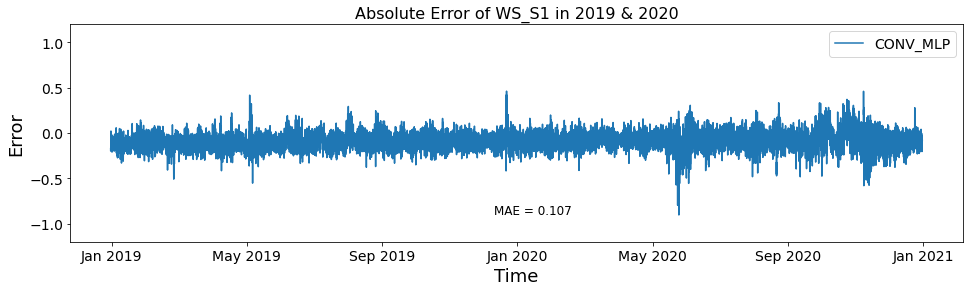

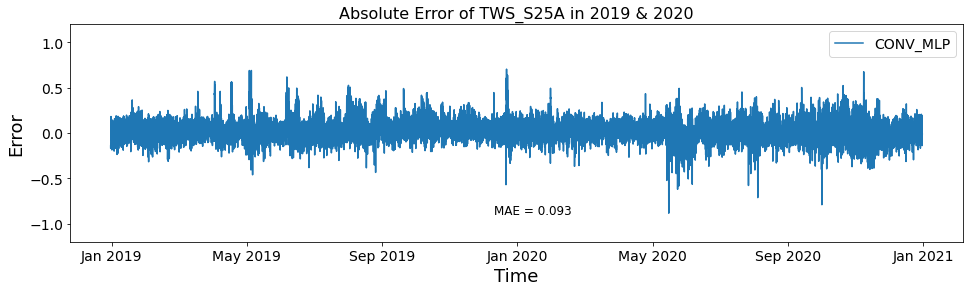

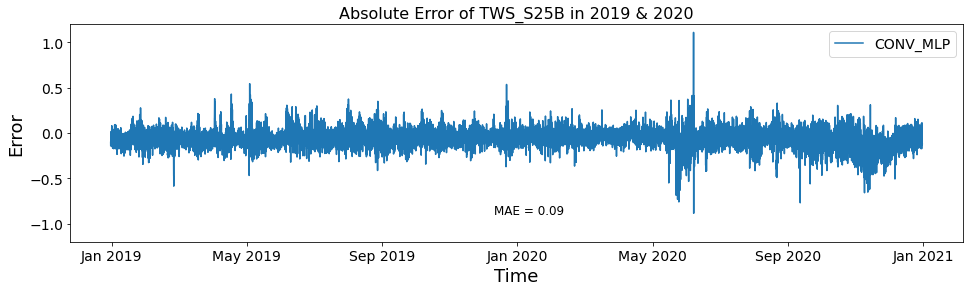

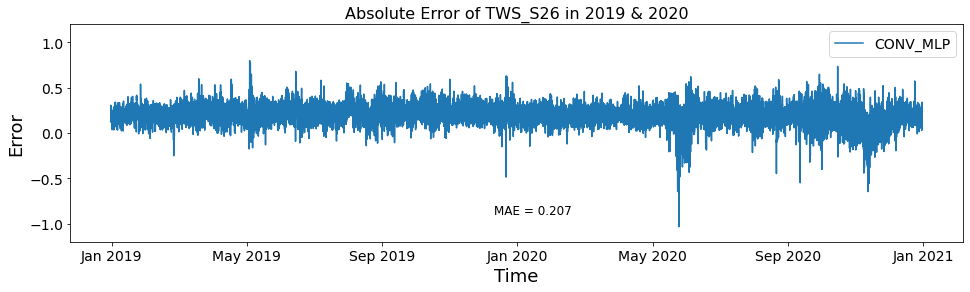

In [89]:
plt.rcParams["figure.figsize"] = (16, 4)
months = ['Jan 2019', 'May 2019', 'Sep 2019', 'Jan 2020', 'May 2020', 'Sep 2020', 'Jan 2021']

# 17544 = 24 hours * (365+366) days
# locations = ['WS_S1', 'TWS_S25A', 'TWS_S25B', 'TWS_S26', 'STORAGE', 'HWS_S25A', 'HWS_S25B']
locations = ['WS_S1', 'TWS_S25A', 'TWS_S25B', 'TWS_S26']
for i, col in enumerate([-4, -3, -2, -1]):
    plt.plot(error.iloc[-17544:, col], label='CONV_MLP')
    plt.xlabel('Time', fontsize=18)
    plt.ylabel('Error', fontsize=18)
    plt.ylim(-1.2, 1.2)
    plt.xticks(np.arange(1726, 19270, 2923), months, fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14)
    plt.title('Absolute Error of {} in 2019 & 2020'.format(locations[i]), fontsize=16)
    # plt.savefig('figures/Test_Error_rnn_chop.png', dpi=300)
    plt.text(10000, -0.9, 'MAE = {}'.format(float("{:.3f}".format(sum(abs(error.iloc[-17544:, col]))/17544))), fontsize=12)
    plt.show()
    plt.close()

In [79]:
error_24th_hour = error.iloc[:, [-4, -3, -2, -1]]  # last 4 columns --> t+12
error_24th_hour

,92,93,94,95
0,-0.140851,0.039559,-0.087826,0.172239
1,-0.034891,0.172414,-0.057309,0.196227
2,-0.139628,0.010135,-0.033195,0.176680
3,-0.159295,-0.108714,-0.063468,0.063376
4,-0.221962,-0.092426,-0.140337,0.073931
...,...,...,...,...
19244,-0.140456,-0.115215,-0.093551,0.207430
19245,-0.031082,-0.017422,0.012724,0.340520
19246,-0.031749,-0.050579,-0.078338,0.256106
19247,-0.062478,-0.023570,-0.132331,0.203255


In [54]:
error_24th_hour.columns = ['WS_S1', 'TWS_S25A', 'TWS_S25B', 'TWS_S26']
error_24th_hour

,WS_S1,TWS_S25A,TWS_S25B,TWS_S26
0,0.053200,0.068432,-0.090838,0.244846
1,0.132295,0.152823,0.032014,0.313438
2,0.033162,0.054719,0.032115,0.249030
3,-0.120210,-0.083888,-0.121302,0.109635
4,-0.127221,-0.168551,-0.172923,0.048043
...,...,...,...,...
19244,0.069842,-0.046126,-0.101151,0.191032
19245,0.123014,0.087450,-0.082097,0.261183
19246,0.044581,0.097923,-0.099668,0.226854
19247,0.065251,0.120756,-0.085572,0.294381


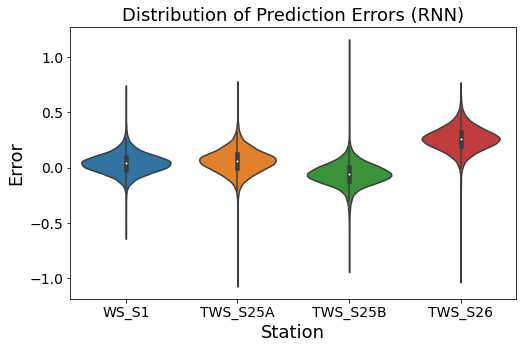

In [55]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (8, 5)
# plt.grid()
plt.xlabel('Station', fontsize=18)
plt.ylabel('Error', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of Prediction Errors (RNN)', fontsize='18')
ax = sns.violinplot(data=error_24th_hour[['WS_S1', 'TWS_S25A', 'TWS_S25B', 'TWS_S26']])